<div><span style="background-color: #9e4244; padding-top: 80px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 22px; font-weight: bold">Session 3: Tree-Based Ensemble Models</span></div>

by BYJ Cirio

<div class="alert alert-danger alert-info">
     In this notebook you will be learning the different tree-based ensemble models. Specifically, the topics covered are as follows:<br>
    <ol>
        <li>Decision-Tree</li>
        <li>Random Forest</li>
        <li>Gradient Boosting</li>
        <li><i>Exercise: Further hypertune the tree-based ensemble models</i></li>
    </ol>
</div>

In [28]:
# general libraries
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ShuffleSplit, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [9]:
df = pd.read_csv('data/cc_df_proj.csv', nrows=100000)
df.head()

,lat,long,city_pop,amt,is_fraud,merch_lat,merch_long,trans_day,age,gender_M,...,trans_month_str_Mar,trans_month_str_May,trans_month_str_Nov,trans_month_str_Oct,trans_month_str_Sep,part_of_day_afternoon,part_of_day_breakfast,part_of_day_dinner,part_of_day_early morning,part_of_day_lunch
0,14.5833,121.0333,386276,35.16,0,15.288587,120.878945,21,63,1,...,0,0,0,1,0,1,0,0,0,0
1,14.5833,121.0333,386276,69.11,0,15.126879,120.581111,10,62,1,...,0,0,0,0,0,0,0,0,1,0
2,14.5833,121.0333,386276,64.68,0,13.602285,121.657351,15,62,1,...,0,0,0,0,0,0,0,0,1,0
3,14.5833,121.0333,386276,87.48,0,13.613058,121.609547,17,62,1,...,0,1,0,0,0,0,1,0,0,0
4,14.5833,121.0333,386276,5.53,0,14.694617,121.334535,22,63,1,...,0,0,0,0,0,1,0,0,0,0


Would Recommend:       0
0  99142
1    858
Proportion Chance Criterion: 98.30%
1.25 * Proportion Chance Criterion: 122.87%


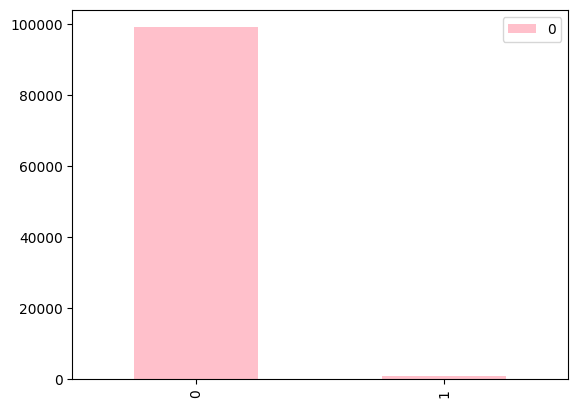

In [10]:
state_counts = Counter(df['is_fraud'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar', color='pink')

num=(df_state[0]/df_state[0].sum())**2

print("Would Recommend:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

In [11]:
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']
(X_train, X_test, y_train, y_test) = train_test_split(X, 
                                                      y, 
                                                      random_state=42, 
                                                      test_size=0.25) 

In [15]:
import pickle as pkl

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Gradient Boosting </span></div>

<b>Gradient boosting</b> works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one

<i>learning_rate</i>- how strongly each tree tries to correct the mistakes of the previous trees <br>

In [29]:
import time 
start = time.time()

print("Fitting GBM")

param_grid = {"n_estimators": np.arange(1,3),
             "learning_rate": [0.10, 0.20, 0.30],
             "max_depth": np.arange(1,3)}

gb = GradientBoostingClassifier(random_state = 42)

shuffle_split = StratifiedShuffleSplit(n_splits = 3, test_size = 0.25)


grid = GridSearchCV(gb, param_grid, cv=shuffle_split, n_jobs = 2, verbose = 2)

grid.fit(X,y)

print("The best model is %s" % grid.best_estimator_)
print("Runtime (in seconds): ", time.time() - start)



Fitting GBM
Fitting 3 folds for each of 12 candidates, totalling 36 fits
The best model is GradientBoostingClassifier(learning_rate=0.3, max_depth=2, n_estimators=2,
                           random_state=42)
Runtime (in seconds):  109.1326515674591


In [ ]:
import time 
start = time.time()

print("Fitting GBM")

param_grid = {"n_estimators": np.arange(1,11),
             "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35],
             "max_depth": np.arange(1,11)}

gb = GradientBoostingClassifier(random_state = 42)

shuffle_split = StratifiedShuffleSplit(n_splits = 5, test_size = 0.25)


grid = GridSearchCV(gb, param_grid, cv=shuffle_split, n_jobs = 2, verbose = 10)

grid.fit(X,y)

print("The best model is %s" % grid.best_estimator_)
print("Runtime (in seconds): ", time.time() - start)



Fitting GBM
Fitting 5 folds for each of 700 candidates, totalling 3500 fits


In [ ]:
#best model
best_gb = grid.best_estimator_
best_gb.fit(X,y)

In [ ]:
# save the model to a pickle file
pickle_file_name = "gb_gridsearch_proj1.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(grid, file)

In [ ]:
# save the model to a pickle file
pickle_file_name = "gb_gridsearch_proj2.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(gb_learningrate, file)

In [14]:
# import time 
# start = time.time()
# all_training = pd.DataFrame()
# all_test = pd.DataFrame()
# for seedN in tqdm(range(1,10,1)):
#     X_train, X_test, y_train, y_test = train_test_split(X,y, 
#                                                         test_size=0.25, random_state=seedN)

#     training_accuracy = []
#     test_accuracy = []
#     maxdepth_settings = range(1, 11) # try maxdepth from 1 to 10

#     for depth in tqdm(maxdepth_settings):   
#         tree = GradientBoostingClassifier(max_depth=depth)  # build the model
#         tree.fit(X_train, y_train)

#         training_accuracy.append(tree.score(X_train, y_train)) # record training set accuracy
#         test_accuracy.append(tree.score(X_test, y_test))   # record generalization accuracy
    
#     all_training[seedN]=training_accuracy
#     all_test[seedN] = test_accuracy
# print("Runtime (in secs): ", time.time() - start)

In [ ]:
# from sklearn import svm, datasets
# from sklearn.model_selection import GridSearchCV
# iris = datasets.load_iris()
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(iris.data, iris.target)
# GridSearchCV(estimator=SVC(),
#              param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
# sorted(clf.cv_results_.keys())
# ['mean_fit_time', 'mean_score_time', 'mean_test_score',...
#  'param_C', 'param_kernel', 'params',...
#  'rank_test_score', 'split0_test_score',...
#  'split2_test_score', ...
#  'std_fit_time', 'std_score_time', 'std_test_score']


In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(maxdepth_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy")
plt.errorbar(maxdepth_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
bestdepth=np.argmax(all_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(all_test.mean(axis=1)))
print("Best max_depth Parameters = %d" %bestdepth )

In [ ]:
# save the model to a pickle file
pickle_file_name = "tree_proj.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(tree, file)

In [ ]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in tqdm(range(1,10,1)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    learningrate_settings = np.arange(0.1, 0.3, 0.05) # try learning_rate from 0.1 to 0.3

    for rate in tqdm(learningrate_settings):   
        gb_learningrate = GradientBoostingClassifier(learning_rate=rate)  # build the model
        gb_learningrate.fit(X_train, y_train)

        training_accuracy.append(gb_learningrate.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(gb_learningrate.score(X_test, y_test))   # record generalization accuracy
    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(learningrate_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy")
plt.errorbar(learningrate_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("learning_rate")
plt.legend()
bestdepth=np.argmax(all_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(all_test.mean(axis=1)))
print("Best learning_rate Parameters = %d" %bestdepth )

In [ ]:
# save the model to a pickle file
pickle_file_name = "gb_learningrate_proj.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(gb_learningrate, file)

In [ ]:
import time 
start = time.time()
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in tqdm(range(1,10,1)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    n_estimators_settings = range(1, 100) # try number of boosting stages from 1 to 100

    for stage in tqdm(n_estimator_settings):   
        gb_stage = GradientBoostingClassifier(n_estimators=stage)  # build the model
        gb_stage.fit(X_train, y_train)

        training_accuracy.append(gb_stage.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(gb_stage.score(X_test, y_test))   # record generalization accuracy
    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy
print("Runtime (in secs): ", time.time() - start)

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(n_estimators_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy")
plt.errorbar(n_estimators_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Boosting Stages")
plt.legend()
bestdepth=np.argmax(all_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(all_test.mean(axis=1)))
print("Best n_estimators (Boosting Stage) Parameters = %d" %bestdepth )

In [ ]:
# save the model to a pickle file
pickle_file_name = "gb_n_estimators_proj.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(gb_stage, file)

<u>Advantages</u>:

(1) Invariant to scaling of the data

<u>Disadvantages</u>:

(1) Might be longer to run than the decision tree <br>
(2) Sensitive to parameter choice <br>

(3) Does not work well on sparse data